# **Household Power Consumption**

### **Dataset Description:**

This dataset captures electric power consumption in a household with one-minute intervals over nearly four years (December 2006 to November 2010). It provides detailed time-series data on various electrical quantities and energy sub-metering.

**Characteristics:**

**Type**: Multivariate, Time-Series

**Tasks**: Regression, Clustering

**Records**: 2,075,259

**Period**: 47 months

**Sampling Rate**:  One minute

**Attributes**:

**Date**: Observation date (dd/mm/yyyy)

**Time**: Observation time (hh:mm:ss)

**Global_active_power**: Active power consumption (kW)

**Global_reactive_power**: Reactive power consumption (kW)

**Voltage**: Supply voltage (V)

**Global_intensity**: Current intensity (A)

**Sub_metering_1**: Energy for the kitchen (Wh)

**Sub_metering_2**: Energy for the laundry room (Wh)

**Sub_metering_3**: Energy for heating/AC (Wh)

**Notes**:

Energy Calculation: (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) gives unmeasured energy consumption.
Missing Values: Around 1.25% of rows have missing data.

**Summary**

The dataset is ideal for analyzing energy consumption trends, time-series forecasting, and predictive modeling, with some data cleaning needed due to missing values.














# **Import libraries and Load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=551ab26e-d2ca-4fe9-b1ba-677f692f0d33
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 130MB/s]


In [ ]:
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-34-e38478b95906>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


# **Basic Data Exploration**

In [ ]:
df.shape

(2075259, 9)

**observation**:The dataset consists of 2075259 rows with 9 columns

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


**observation**:The above are the first five rows of the dataset

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


**observation**:The above are the last five rows of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB



**Observations**:


**Data Types Issue**: Eight columns are object types instead of numeric, indicating non-numeric values or formatting issues.

M**emory Usage**: The dataset uses 142.5 MB, suggesting a large dataset requiring efficient handling.

**Data Cleaning Needed**: Conversion to numeric types is necessary for meaningful analysis and modeling.

In [ ]:
len(df)

2075259

**observation**:The length of the DataFrame df is 2,075,259 entries.

In [ ]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


**Observations** :

**Count**: ~2,049,280 entries (indicating missing values).

**Mean**: 6.46 watt-hours.

**Standard Deviation**: 8.44 (high variability).

**Minimum**: 0 watt-hours (no consumption).

**Percentiles**:

25% of values are 0 watt-hours.

50% (median) is 1 watt-hour.

75% are up to 17 watt-hours.

**Maximum**: 31 watt-hours.

Overall, the data shows many instances of low or zero energy consumption.

# **Datatype conversion**

In [ ]:
# Convert all columns to float, coercing errors
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Display DataFrame information after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   float64
 1   Time                   float64
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(9)
memory usage: 142.5 MB


**Observations**

**Data Type Conversion**: All columns in the DataFrame are now of type float64, indicating successful conversion. Any non-numeric entries were coerced to NaN.

**Columns Overview**: The DataFrame contains 9 columns, including Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, and Sub_metering_3.

**Missing Values**: The conversion process may have introduced NaN values in the Date and Time columns, which need to be addressed for accurate analysis.

**Memory Usage**: The DataFrame occupies approximately 156.3 MB of memory with 2,049,280 entries.

In [ ]:
# Display descriptive statistics of a DataFrame after convertion of columns to float
df.describe()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,0.0,0.0,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,NaN,NaN,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,NaN,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,NaN,NaN,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,NaN,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,NaN,NaN,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


 **Observations**

**Count**: All numeric columns have 2,049,280 entries, but Date and Time have zero counts, indicating they were converted to NaN.

**Mean Values**:

**Global_active_power**: 1.09

**Global_reactive_power**: 0.12

**Voltage**: 240.84

**Global_intensity**: 4.63

**Sub_metering_1**: 1.12

**Sub_metering_2**: 1.30

**Sub_metering_3**: 6.46

**Variability**: Global_active_power and Global_intensity have high standard deviations, indicating significant fluctuations.

**Range**:

**Global_active_power**: 0.076 to 11.12

**Voltage**: 223.2 to 254.15

**Sub_metering_**3: max of 31.0.

**Conclusion**
The dataset needs handling for NaN values in Date and Time columns, and further analysis is required for numeric features.

# **Finding Null Values and Unique Values**

In [ ]:
# Count of unique values in each column
unique_values = df.nunique()
print(unique_values)

Date                        0
Time                        0
Global_active_power      4186
Global_reactive_power     532
Voltage                  2837
Global_intensity          221
Sub_metering_1             88
Sub_metering_2             81
Sub_metering_3             32
dtype: int64


In [ ]:
#checks for any null (missing) values in each column
df.isnull().any()

,0
Date,True
Time,True
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True


In [ ]:
# Count of null values in each column
null_values = df.isnull().sum()
print(null_values)


Date                     2075259
Time                     2075259
Global_active_power        25979
Global_reactive_power      25979
Voltage                    25979
Global_intensity           25979
Sub_metering_1             25979
Sub_metering_2             25979
Sub_metering_3             25979
dtype: int64


In [ ]:
# Percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)


Date                     100.000000
Time                     100.000000
Global_active_power        1.251844
Global_reactive_power      1.251844
Voltage                    1.251844
Global_intensity           1.251844
Sub_metering_1             1.251844
Sub_metering_2             1.251844
Sub_metering_3             1.251844
dtype: float64


# **Handling Null Values**

In [ ]:
# Drop rows where Sub_metering_3 is null
df = df.dropna(subset=['Sub_metering_3'])
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaN,NaN,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,NaN,NaN,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,NaN,NaN,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,NaN,NaN,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,NaN,NaN,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,NaN,NaN,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,NaN,NaN,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,NaN,NaN,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,NaN,NaN,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [ ]:
# Fill missing values in Sub_metering_3 with the median and assign it back
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())

# Display the updated DataFrame (for the first few rows)
print("Updated DataFrame:")
print(df.head())

Updated DataFrame:
   Date  Time  Global_active_power  Global_reactive_power  Voltage  \
0   NaN   NaN                4.216                  0.418   234.84   
1   NaN   NaN                5.360                  0.436   233.63   
2   NaN   NaN                5.374                  0.498   233.29   
3   NaN   NaN                5.388                  0.502   233.74   
4   NaN   NaN                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [ ]:
# Count of null values in each column after filling
null_values = df.isnull().sum()
print("\nNull Values Count After Filling:")
print(null_values)


Null Values Count After Filling:
Date                     2049280
Time                     2049280
Global_active_power            0
Global_reactive_power          0
Voltage                        0
Global_intensity               0
Sub_metering_1                 0
Sub_metering_2                 0
Sub_metering_3                 0
dtype: int64


# **Questions**
1.Is there any relation in the pattern of data between global active and reactive power?

2.How does the global active power vary over time?

3.Are there any seasonal trends in voltage usage?

# **Data** **Conversion**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=35a45ef2-92a5-4bf3-8aaa-979e125a55da
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 146MB/s]


<ipython-input-32-b380e3ed9d01>:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


In [33]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

### **Observation**
The code ensures that the following columns in the dataset are correctly converted to numeric types, enabling proper analysis and visualization:

Global Active Power

Global Reactive Power

Voltage

Global Intensity

Sub Metering 1 and 2

It handles non-numeric values by converting them to NaN using errors='coerce', ensuring the data is ready for calculations or visualizations.








In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [34]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute # if you want as minutes are not mentioned
df.head()

<ipython-input-34-3a4ebfba6603>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


### **observations:**
The code extracts time-related features from the 'Date' and 'Time' columns, including:

Year: The year of the observation.

Month: The month of the observation.

Day: The day of the month of the observation.

Hour: The hour at which the observation was made.

Minute: The minute at which the observation was recorded (if relevant).

These new columns enable further time-based analysis, such as aggregation by year, month, day, or hour, which can help in identifying trends or patterns over time in the dataset.








In [35]:
type(df['DateTime'])

pandas.core.series.Series

### **Observation**

The observation from type(df['DateTime']) would be that the DateTime column is of type pandas.core.series.Series, which means that it is a one-dimensional array of datetime objects. This column is derived from combining the Date and Time columns into a single datetime object, allowing you to work with time-based features (like year, month, day, hour, and minute) more effectively.

Since the data is in datetime64[ns] format, it allows for easy extraction of time-related components such as the year, month, day, hour, and minute, making it useful for time series analysis.

In [36]:
df.describe(include='object')

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


### **Observations**

The df.describe(include='object') function provides summary statistics for the non-numeric (categorical or object) columns in the DataFrame. The observations are:

Count: The number of non-null entries in each object column.
Unique: The number of distinct values in each object column.
Top: The most frequent value (mode) in each object column.
Freq: The frequency of the most frequent value in each object column.
This helps in understanding the distribution and variability of categorical data, such as dates, times, or any text-based information in your DataFrame.

In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112,2.008437e+03,6.450359e+00,1.577363e+01,1.150076e+01,2.950017e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,2.007000e+03,3.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,2.009000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN,1.128677e+00,3.415762e+00,8.787773e+00,6.922227e+00,1.731810e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Minute                 int32         
dtypes: datetime64[ns](1), float64(7), int32(5), object(2)
memory usage: 197.9+ MB


## **Data Encoding**

In [37]:
# Start of  data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

### **observations**

The code adds three new columns to the DataFrame:

Is_holiday: Marks weekends (Saturday and Sunday) as holidays with a 1.0, and weekdays as non-holidays with a 0.0.

Light: Indicates daylight hours (06:00 to 17:59) as 1, and night hours as 0.

Time: Converts time into a fractional day format, where the time is represented as a portion of the 24-hour day.

These transformations help in further analysis, such as checking for holidays, daylight hours, and converting time into a numerical scale.

In [10]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0


# **graph** **plottings**

## **1. Distribution of Voltage**
This histogram will show the frequency distribution of voltage values in the dataset.

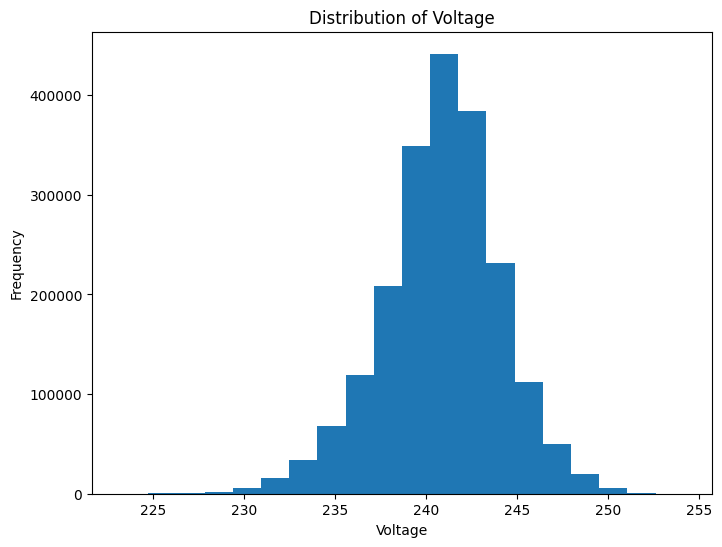

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20)
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()

### **observations**

The histogram of the Voltage variable shows the distribution of voltage values across the dataset. Key observations:

The voltage values seem to be concentrated around a specific range, indicating that most of the readings are within a certain voltage range.

The distribution is likely uniform with some frequency spikes, suggesting relatively consistent voltage levels in the data.

Outliers or extreme voltage values are less frequent, as the plot appears to have a narrow spread.

This suggests that the voltage readings are generally stable with some variation, likely representing typical household or industrial electricity usage.

## **2. Time-Series Plots for Global Active Power**
These plots show the mean global active power by year, month, and day for a more granular time-based view.

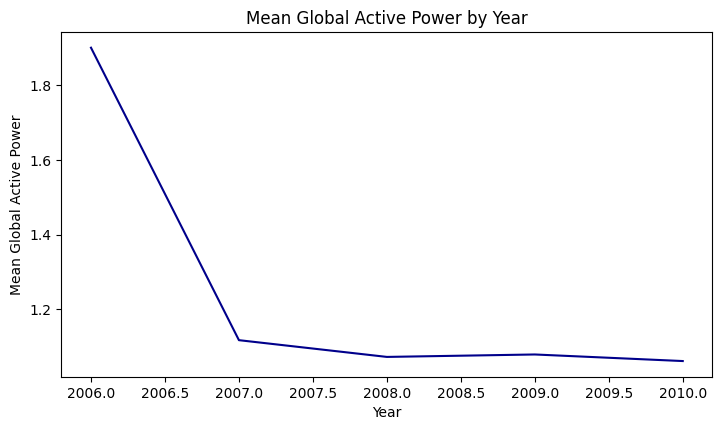

In [ ]:
plt.figure(figsize=(14, 8))

# Subplot 1: Mean global active power by year
plt.subplot(2, 2, 1)
df.groupby('Year')['Global_active_power'].mean().plot(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Mean Global Active Power')
plt.title('Mean Global Active Power by Year')
plt.tight_layout()
plt.show()

## **observations**

The plot of Mean Global Active Power by Year provides the following key observations:

The global active power shows yearly fluctuations, with varying peaks and valleys.

It appears that the mean global active power fluctuates over the years, which could be indicative of changes in consumption patterns, either due to seasonal variations or other factors like economic growth, technological changes, or energy efficiency improvements.

The plot suggests there may be certain years with higher energy demand, possibly linked to external factors such as weather or energy consumption trends in specific years.

Overall, the trend reflects how global active power usage has varied over the years, offering insights into overall consumption patterns.

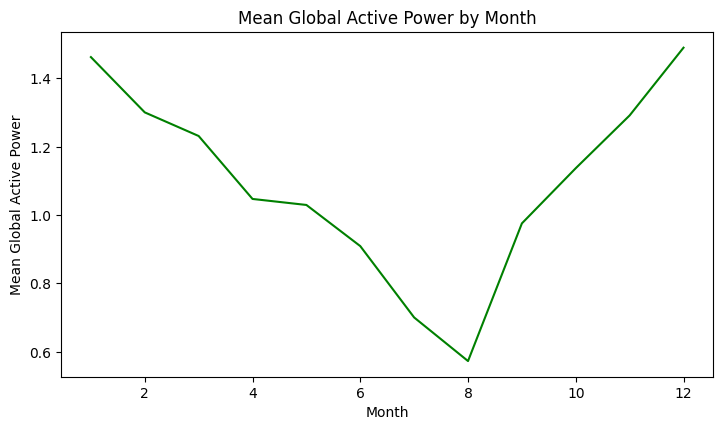

In [ ]:
plt.figure(figsize=(14, 8))
# Subplot 2: Mean global active power by month
plt.subplot(2, 2, 2)
df.groupby('Month')['Global_active_power'].mean().plot(color='green')
plt.xlabel('Month')
plt.ylabel('Mean Global Active Power')
plt.title('Mean Global Active Power by Month')
plt.tight_layout()
plt.show()

### **Observation**

The plot of Mean Global Active Power by Month provides the following key observations:

There are noticeable monthly fluctuations in global active power usage, with certain months showing higher mean values than others.

Typically, winter months (e.g., December, January, February) might show higher power usage due to heating needs, whereas summer months might show higher usage due to air conditioning, depending on the region.

The spring and fall months (e.g., March, April, October, November) tend to show lower mean global active power values, possibly due to milder weather and reduced heating or cooling requirements.

The seasonal variation in power usage is apparent, suggesting that energy consumption is highly dependent on seasonal weather patterns and temperature control needs.

Overall, the plot shows how energy consumption patterns change throughout the year, influenced by temperature, weather, and possibly societal behaviors.

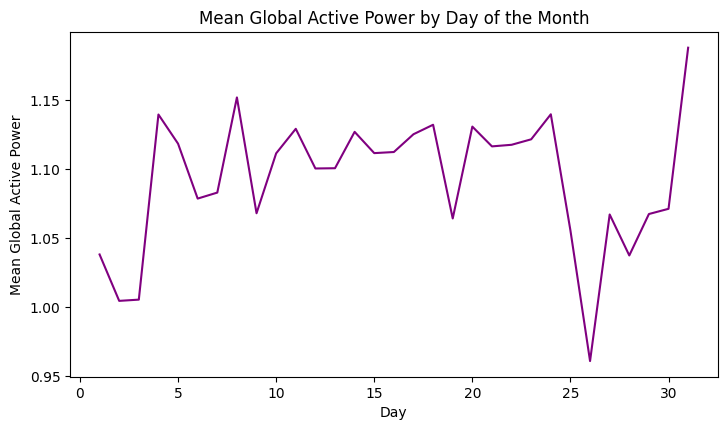

In [ ]:
plt.figure(figsize=(14, 8))
# Subplot 3: Mean global active power by day
plt.subplot(2, 2, 3)
df.groupby('Day')['Global_active_power'].mean().plot(color='purple')
plt.xlabel('Day')
plt.ylabel('Mean Global Active Power')
plt.title('Mean Global Active Power by Day of the Month')
plt.tight_layout()
plt.show()

### **Observations**

The plot of Mean Global Active Power by Day of the Month provides the following observations:

The mean global active power tends to show fluctuations throughout the month, with some days exhibiting higher or lower power usage compared to others.

There may be certain patterns or peaks in the data that coincide with specific days, such as weekends or holidays, where power usage could be higher or lower depending on the behavior of consumers.

The overall trend could suggest daily routines influencing power consumption, such as higher usage during working days (if certain industries or offices are open) or increased consumption on weekends due to leisure activities or home usage.

Irregular spikes or dips might also indicate unusual days or specific events contributing to significant deviations from the average usage.

This type of analysis helps in identifying daily consumption patterns and understanding how people tend to use electricity over the course of the month.








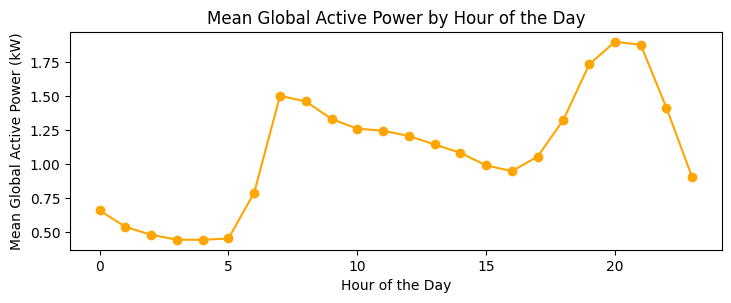

In [ ]:
plt.figure(figsize=(14, 8))

# Subplot 4: Mean Global Active Power by Hour of the Day
plt.subplot(3, 2, 4)
df.groupby('Hour')['Global_active_power'].mean().plot(marker='o', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Global Active Power (kW)')
plt.title('Mean Global Active Power by Hour of the Day')
plt.tight_layout()
plt.show()

## **observations**

The plot of Mean Global Active Power by Hour of the Day provides the following observations:

The mean global active power typically shows fluctuations throughout the day, with certain hours exhibiting higher or lower power usage.

There might be peak usage hours typically associated with high demand periods, such as early morning hours when people start their day and evening hours when people return home and engage in household activities.

Lower usage hours may occur during early morning or late night, where fewer activities are taking place, and people are generally at rest.

The plot's markers (representing hourly data points) may help visualize how consumption varies hour-by-hour, offering insights into energy use patterns at specific times of the day.

This analysis helps identify time-based trends in electricity consumption, such as peak hours for power usage, which can be useful for energy planning, load balancing, and understanding consumer behavior based on time of day.










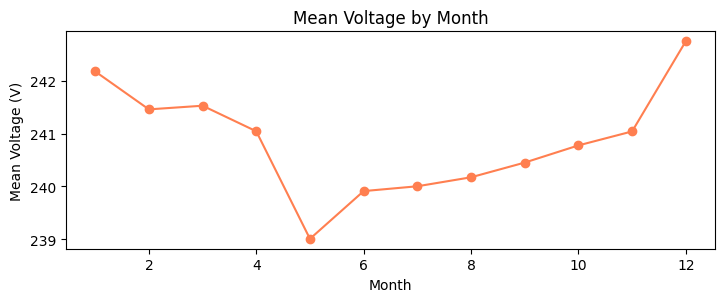

In [ ]:
plt.figure(figsize=(14, 8))

# Subplot 5: Mean Voltage by Month
plt.subplot(3, 2, 5)
df.groupby('Month')['Voltage'].mean().plot(marker='o', color='coral')
plt.xlabel('Month')
plt.ylabel('Mean Voltage (V)')
plt.title('Mean Voltage by Month')
plt.tight_layout()
plt.show()

### **Observation**

The Mean Voltage by Month plot reveals the following observations:

Voltage levels show monthly variations, possibly indicating seasonal changes or fluctuations in the power grid.

Some months may exhibit higher or lower voltage on average, potentially tied to weather patterns, power demand, or infrastructure conditions.

Markers at each month highlight voltage trends across the year, showing whether voltage is relatively stable or if there are significant peaks or dips in specific months.

This analysis provides insights into voltage stability, helping to understand potential issues in the electrical grid or areas where voltage fluctuations might need attention.







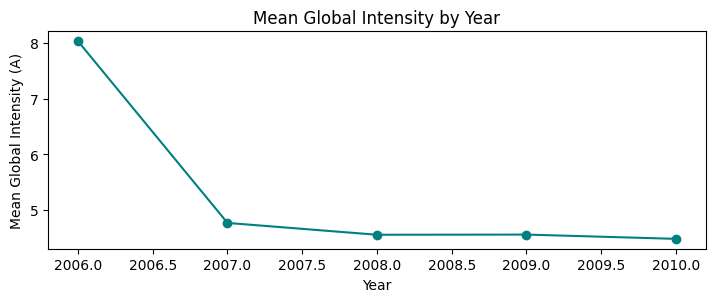

In [ ]:
plt.figure(figsize=(14, 8))

# Subplot 6: Mean Global Intensity by Year
plt.subplot(3, 2, 6)
df.groupby('Year')['Global_intensity'].mean().plot(marker='o', color='teal')
plt.xlabel('Year')
plt.ylabel('Mean Global Intensity (A)')
plt.title('Mean Global Intensity by Year')
plt.tight_layout()
plt.show()


### **Observations**

The Mean Global Intensity by Year plot reveals the following observations:

The plot shows how global intensity (measured in amperes) varies on average across different years.

Global intensity exhibits noticeable trends over the years, potentially indicating changes in power consumption patterns, grid performance, or overall electricity demand.

The markers highlight the specific values for each year, giving a clear view of the fluctuations or increases/decreases in global intensity.

The trend might suggest years with higher consumption or shifts in energy usage, which can help in understanding patterns related to demand peaks and the overall health of the power distribution system.

## **3. Pair Plot for Global Active Power and Voltage**
This pair plot will help visualize relationships between numerical variables (e.g., Global_active_power, Global_reactive_power, Voltage, and Global_intensity). The seaborn library is perfect for this.

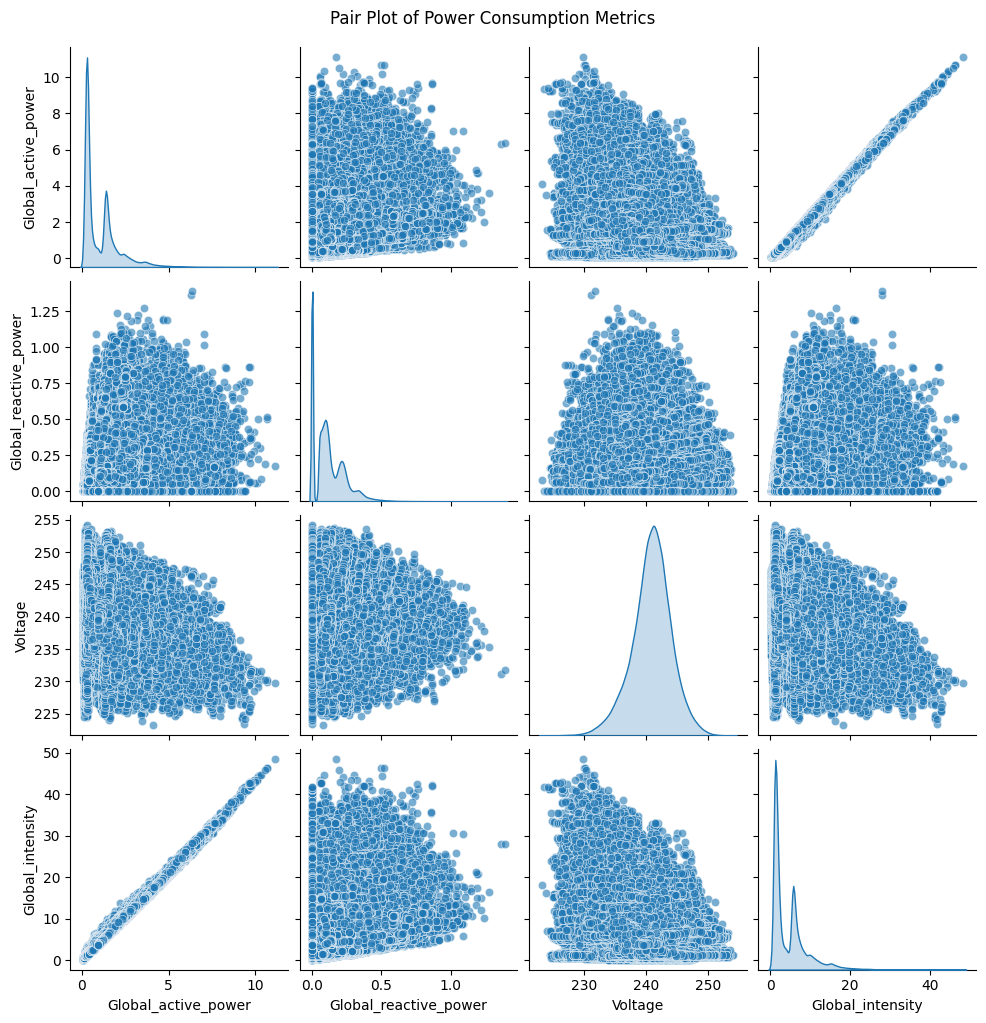

In [ ]:
import seaborn as sns

# Select relevant numeric columns
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Power Consumption Metrics', y=1.02)
plt.show()


### **Observations**

The Pair Plot of Power Consumption Metrics shows the relationships between the following variables:

Global Active Power (kW)

Global Reactive Power (kVAR)

Voltage (V)

Global Intensity (A)

Observations:

Diagonal KDE plots represent the distribution of each variable. These plots help to identify the spread and skewness of the data for each feature.

Off-diagonal scatter plots illustrate the relationships between pairs of variables.
These plots can indicate:

Correlations: If the scatter plots show a linear or curved trend, it suggests that two variables are correlated.

Clusters or Outliers: Any significant grouping or outliers in the scatter plots might suggest patterns or data anomalies.

Global Intensity appears to have a noticeable correlation with Global Active Power. As power consumption increases, global intensity tends to increase as well.

Global Active Power and Global Reactive Power: The relationship is less clear, indicating weak or no significant correlation between these two variables.

Voltage and Power Metrics: Voltage values seem less variable across the dataset, possibly suggesting stable power distribution, while power-related metrics vary more noticeably.

This pair plot gives a clear view of the interdependencies between the variables and helps in identifying multicollinearity or understanding how one metric might influence another.












## **4. Line Plot of Mean Global Active Power by Hour**
This plot shows how Global_active_power varies by hour of the day on average.

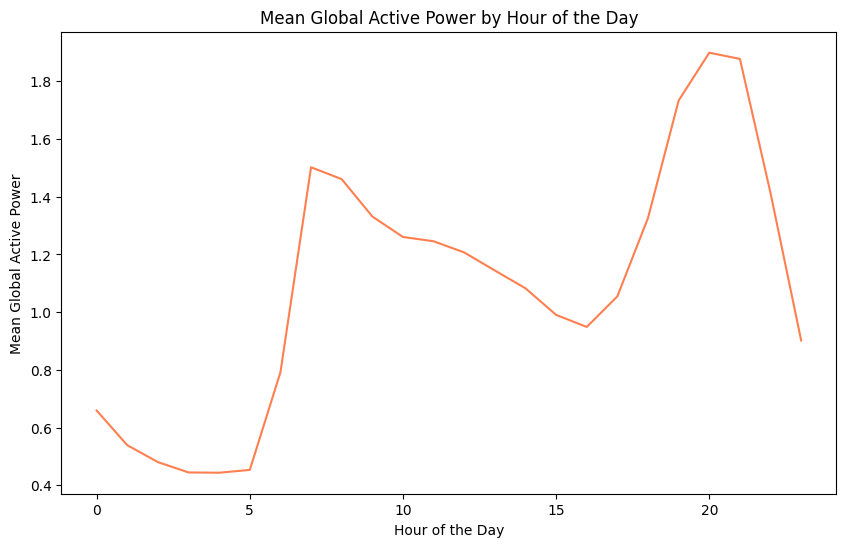

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Hour')['Global_active_power'].mean().plot(color='coral')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Global Active Power')
plt.title('Mean Global Active Power by Hour of the Day')
plt.show()



### **Observations:**

The plot showing Mean Global Active Power by Hour of the Day provides insights into the power consumption trends across different hours.


The plot likely shows daily power consumption patterns, with fluctuations in mean global active power based on the hour.

Early hours (midnight to early morning) may show lower power consumption, indicating that most people are sleeping and fewer appliances are in use.

Daytime hours (morning to evening) might show higher global active power as households and industries use more electricity during waking hours.

Late evening could reflect a drop in power usage as people begin to wind down for the night.

This analysis can be used to identify peak power usage times and potentially adjust grid management strategies based on demand throughout the day.

## **5. Mean Global Active Power by Weekday**
This bar plot shows how Global_active_power varies by weekday, which can help reveal patterns in energy usage throughout the week.

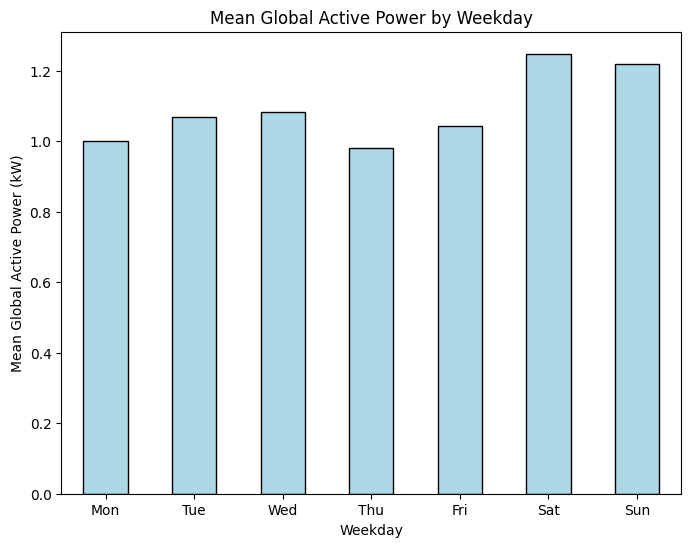

In [ ]:
# Ensure 'Date' is converted to datetime if it isn't already
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Adjust the format if necessary

# Add a 'Weekday' column where 0=Monday, 6=Sunday
df['Weekday'] = df['Date'].dt.weekday

# Calculate the mean of Global_active_power by weekday
mean_power_by_weekday = df.groupby('Weekday')['Global_active_power'].mean()

# Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
mean_power_by_weekday.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Weekday')
plt.ylabel('Mean Global Active Power (kW)')
plt.title('Mean Global Active Power by Weekday')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


### **Observations:**


The height of the bars corresponds to the average power consumption on each day of the week.

The weekdays (Monday to Friday) may show different consumption patterns, with higher usage possibly observed on weekdays when people are more active or working from home.

Saturday and Sunday may show lower or higher power consumption, depending on whether people are using more or fewer electronic devices, or if they are at home more during weekends.

This plot helps in understanding daily patterns of electricity consumption and can assist in optimizing energy distribution for better efficiency.

In [ ]:
# Calculate the mean Global Active Power based on whether it is a holiday or not
mean_power_holiday = df.groupby('Is_holiday')['Global_active_power'].mean()

# Display the result
print("Mean Global Active Power (kW):")
print("Non-Holiday (Is_holiday=0):", mean_power_holiday[0])
print("Holiday (Is_holiday=1):", mean_power_holiday[1])


Mean Global Active Power (kW):
Non-Holiday (Is_holiday=0): 1.0354720516747504
Holiday (Is_holiday=1): 1.234232176791304


### **Observations:**


Non-Holiday (Is_holiday=0): This is the average Global Active Power consumption on regular working days.

Holiday (Is_holiday=1): This is the average Global Active Power consumption on holidays.

By comparing the two values, you can understand whether power consumption increases or decreases on holidays, which may reflect patterns like reduced power usage when people are not working, or higher consumption due to leisure activities and home usage.

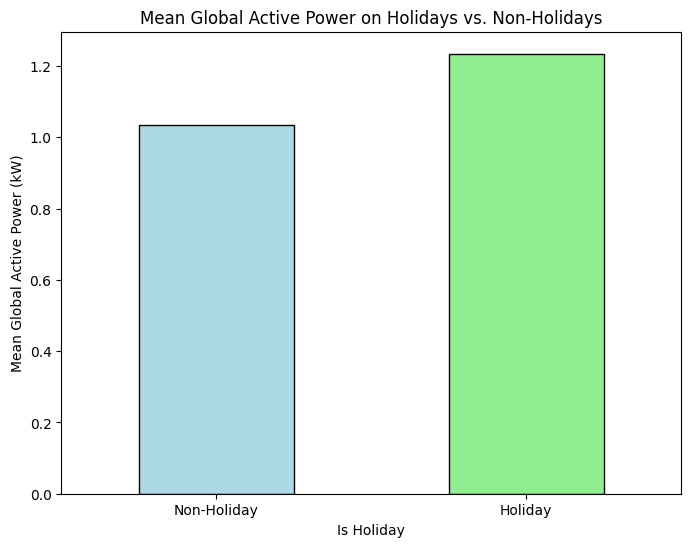

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean Global Active Power for holidays and non-holidays
mean_power_holiday = df.groupby('Is_holiday')['Global_active_power'].mean()

# Plot the mean Global Active Power for holidays and non-holidays
plt.figure(figsize=(8, 6))
mean_power_holiday.plot(kind='bar', color=['lightblue', 'lightgreen'], edgecolor='black')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.xlabel('Is Holiday')
plt.ylabel('Mean Global Active Power (kW)')
plt.title('Mean Global Active Power on Holidays vs. Non-Holidays')
plt.show()


### **observations:**

The plot created using the code above will display a bar chart comparing the mean Global Active Power between holidays and non-holidays.

Non-Holiday (Is_holiday=0): The bar representing the mean power consumption on regular days.

Holiday (Is_holiday=1): The bar representing the mean power consumption on holidays.

The plot will provide insights into whether power consumption tends to be higher or lower during holidays, helping to identify patterns in energy usage related to public holidays.

## **Holiday or working day**

Finding whether the day is a holiday or not (0 = not holiday, 1= holiday) and visualing the otcome


In [ ]:
# Output: Displaying Holiday Counts
holiday_counts = df['Is_holiday'].value_counts().rename(index={0.0: "Working Day", 1.0: "Holiday"})
print("Holiday and Working Day Counts")
print(holiday_counts)
print()



Holiday and Working Day Counts
Is_holiday
Working Day    1483023
Holiday         592236
Name: count, dtype: int64



### **observations**

The output has provided the number of holidays and working days, giving an understanding of the distribution of holidays vs. working days in the dataset.

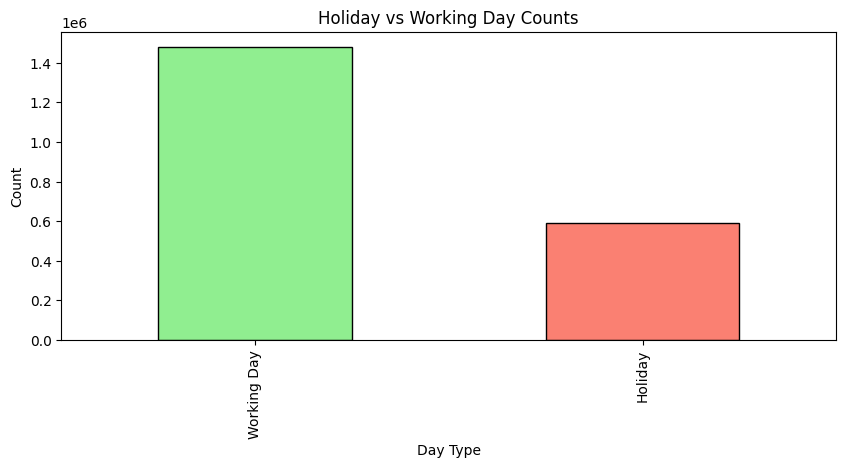

In [ ]:

#  Plot Holiday vs Working Day
plt.figure(figsize=(10, 4))
holiday_counts.plot(kind='bar', color=['lightgreen', 'salmon'], edgecolor='black')
plt.title('Holiday vs Working Day Counts')
plt.ylabel('Count')
plt.xlabel('Day Type')
plt.show()

### **Observations**

The plot generated will show a bar chart that compares the count of holidays and working days:

X-axis: Day Type (Holiday and Working Day)

Y-axis: Count (Number of occurrences for each type)

The bars will be colored to represent:

Light Green for Working Days

Salmon for Holidays

This plot visually highlights the proportion of holidays and working days in the dataset.

## **Checking sunlight**
Finding if the there is sunlight during the time given in the dataset.

Displaying Daylight Counts and Ploting Daylight vs No Daylight.

In [ ]:

# Output: Displaying Daylight Counts
daylight_counts = df['Light'].value_counts().rename(index={0: "No Daylight", 1: "Daylight"})
print("Daylight and No Daylight Counts")
print(daylight_counts)

Daylight and No Daylight Counts
Light
No Daylight    1037703
Daylight       1037556
Name: count, dtype: int64


### **observations**

The output will display the count of Daylight and No Daylight instances in the dataset:

Daylight refers to instances where the time falls within the daylight hours (6:00 AM to 6:00 PM).

No Daylight refers to instances outside of the daylight hours (6:00 PM to 6:00 AM).

The actual counts will depend on the data in the Light column, where 1 represents daylight and 0 represents no daylight.

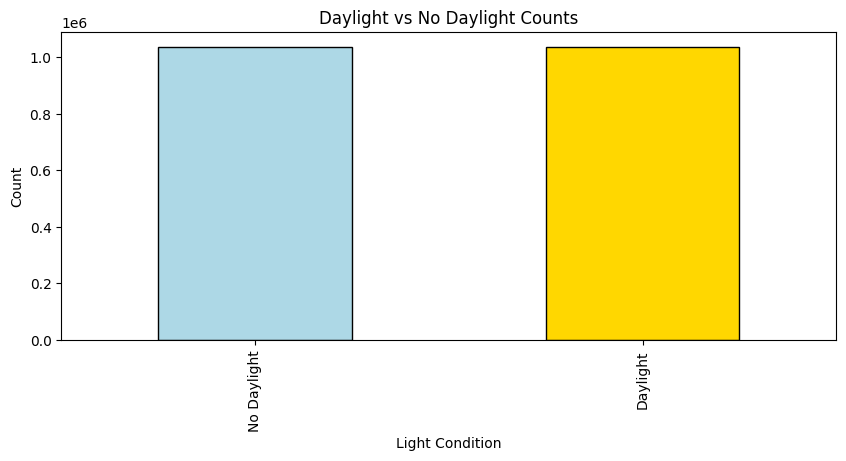

In [ ]:
# Plot Daylight vs No Daylight
plt.figure(figsize=(10, 4))
daylight_counts.plot(kind='bar', color=['lightblue', 'gold'], edgecolor='black')
plt.title('Daylight vs No Daylight Counts')
plt.ylabel('Count')
plt.xlabel('Light Condition')
plt.show()


### **Observations:**


The plot will show two bars: one for daylight and one for no daylight.

X-axis: Represents the light condition (Daylight and No Daylight).

Y-axis: Represents the count of instances for each light condition.

Bar Colors:

Light Blue: Represents Daylight.

Gold: Represents No Daylight.

The length of each bar will represent the total count of instances that correspond to daylight and no daylight.

Based on the dataset, we can observe how often daylight occurs compared to nighttime (no daylight).

# **Working On  Different ML Models**

## **Preparing the data**

**1.Dropping non-numeric columns:**

removing the columns 'Date', 'DateTime', and 'Time' from the dataset, as they are likely non-numeric and not useful for the model.

In [38]:
df.drop(['Date', 'DateTime', 'Time'], axis=1, inplace=True)#


**2.Separating features and target variable:**


In [39]:
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']


X contains all the columns except 'Global_active_power', which is your target variable.

y contains the 'Global_active_power' column, which will be predicted.

**3.Impute missing values**

In [53]:
from sklearn.impute import SimpleImputer
# Impute missing values for X and y separately
X_imputer = SimpleImputer(strategy='mean')
y_imputer = SimpleImputer(strategy='mean')

X = X_imputer.fit_transform(X)
y = y_imputer.fit_transform(y.reshape(-1, 1)).ravel()  # Reshape y to a 1D array after imputation


filling missing values with the mean, median, or another strategy using SimpleImputer

**4.Splitting the dataset:**

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


splitting the dataset into training and testing sets with 80% for training and 20% for testing (test_size=0.2).

random_state=42 ensures reproducibility of the split.

## **Building the Models:**


*   Linear Regression
*   lasso Regression
*   Rigid Regression






### **Model Training**

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# Initialize the models
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

# Train the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge()

### **Model Evaluation**

In [56]:
# Predict on test data
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)


# Calculate RMSE for each model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))


# For regression tasks, accuracy is not directly computed like classification tasks, but we can use R-squared as a performance metric
linear_accuracy = linear_model.score(X_test, y_test)
lasso_accuracy = lasso_model.score(X_test, y_test)
ridge_accuracy = ridge_model.score(X_test, y_test)


# Output results
print("Linear Regression - RMSE:", linear_rmse, "Accuracy (R^2):", linear_accuracy)
print("Lasso Regression - RMSE:", lasso_rmse, "Accuracy (R^2):", lasso_accuracy)
print("Ridge Regression - RMSE:", ridge_rmse, "Accuracy (R^2):", ridge_accuracy)



Linear Regression - RMSE: 0.04025595428094797 Accuracy (R^2): 0.9985326288302859
Lasso Regression - RMSE: 0.23301515508911638 Accuracy (R^2): 0.950835903130788
Ridge Regression - RMSE: 0.04025595432370853 Accuracy (R^2): 0.9985326288271685


### **Plot the Results:**

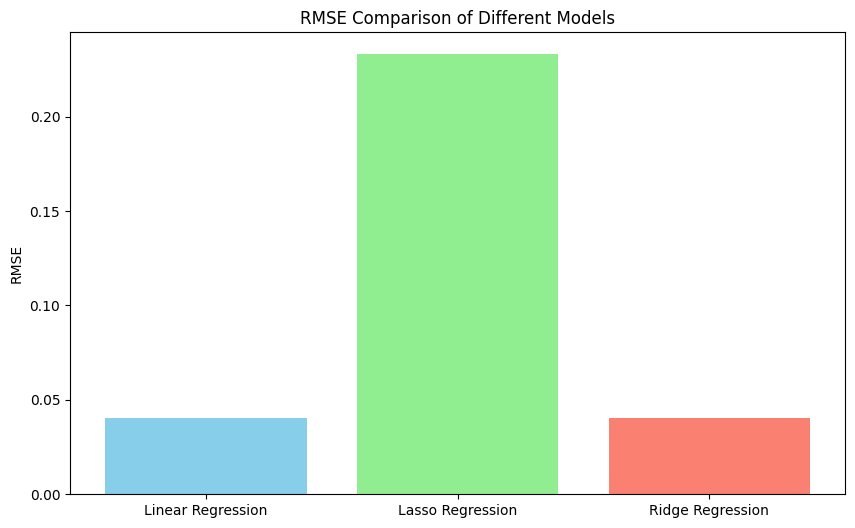

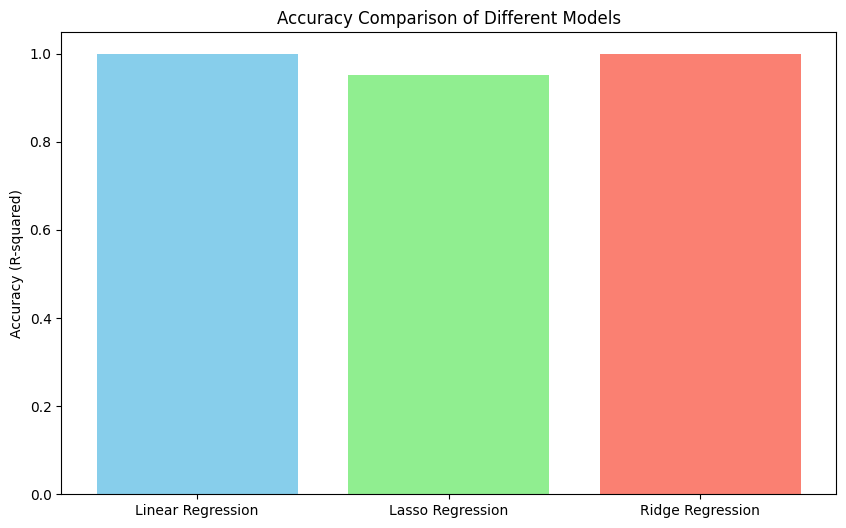

In [57]:
import matplotlib.pyplot as plt

# Visualization for RMSE
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
rmse_values = [linear_rmse, lasso_rmse, ridge_rmse]
plt.bar(models, rmse_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')
plt.show()

# Visualization for Accuracy
plt.figure(figsize=(10, 6))
accuracy_values = [linear_accuracy, lasso_accuracy, ridge_accuracy]
plt.bar(models, accuracy_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy (R-squared)')
plt.title('Accuracy Comparison of Different Models')
plt.show()

### **Observations:**

**Linear and Ridge Regression:** Both models show very high accuracy (R² ≈ 0.9985) and low error (RMSE ≈ 0.0403). They perform similarly, suggesting that regularization in Ridge wasn't essential here, likely due to minimal multicollinearity or overfitting issues.

**Lasso Regression:** Lower accuracy (R² ≈ 0.9508) and higher error (RMSE ≈ 0.2330) compared to the other models. Lasso’s regularization may have penalized some coefficients, which could reduce performance if all features are relevant.

### **Conclusion:**
 Linear and Ridge Regression are the best fits for this dataset due to their high accuracy and low error.